#Q3 (a)
##Pendulum problem has beeen solve with various time steps dt = 0.05, 0.025, 0.0125, 0.001 s.  
## We can as we decrease the time steps, we get better solutions  
## The solution blows up for the time steps 0.05s, 0.025s and 0.0125s, whereas for time step of 0.001s, the solution converges to exact analytical solution

time step = 0.05


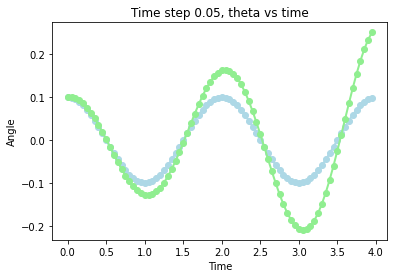

time step = 0.025


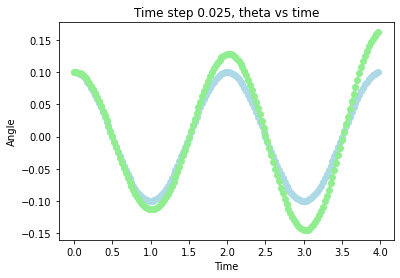

time step = 0.0125


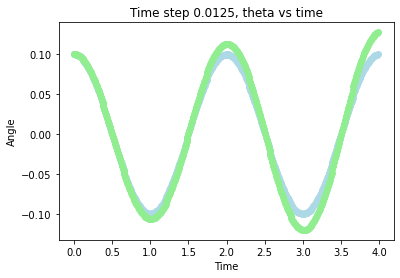

time step = 0.001


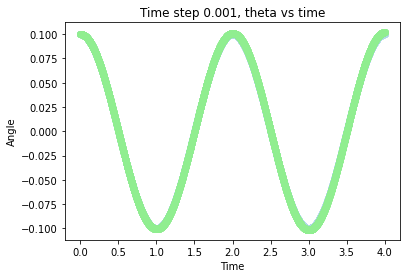

In [3]:
# Finite differences for the simple pendulum

import matplotlib.pyplot as plt
import numpy as np
import scipy
import time
i=1
# set up problem parameters
l = 1 # length of simple pendulum in meters
g  = 9.87 # gravity
omega = np.sqrt(g/l) # Natural frequency
T = 4.   # final time in seconds
K=[0.05, 0.025, 0.0125, 0.001]
for k in K:
  M = int(T/k)   # number of time steps
  t = np.arange(M)*k
  #t1 = np.arrange(M)
  print ("time step =", k)

  # define the initial data
  theta0 = 0.1
  v0 = 0.
  theta1 = theta0
  v1 = v0

  thetaE = np.zeros(M)
  thetaN = np.zeros(M)
  thetaN[0] = theta0
  # analytical linear solution
  for j in range(M):
      thetaE[j] = theta0*np.cos(omega*t[j])

  # forward in time
  def ftheta(theta, v):
      thetadot = v/l
      thetaF = theta + k*thetadot
      return thetaF

  def fv(theta,v):
      vdot = -g*np.sin(theta)
      vF = v + k*vdot
      return vF

  for j in range(1,M):
      theta2 = ftheta(theta1,v1)
      v2 = fv(theta1,v1)
      thetaN[j] = theta2
      theta1 = theta2
      v1 = v2
  
  plt.plot(t, thetaE, linewidth=2, color='lightblue', marker='o')
  plt.plot(t, thetaN, linewidth=2, color='lightgreen', marker='o')
  plt.title('Time step {}, theta vs time'.format(k))
  plt.xlabel('Time')
  plt.ylabel('Angle')
  plt.show()

# Q3 (b)  
## Now, we change the length of the pendulum to see it's effect on time period  
## l is varied as 1m, 2m, 3m, 4m, we can see the time period increasing with increasing length of pendulum

Length is = 1


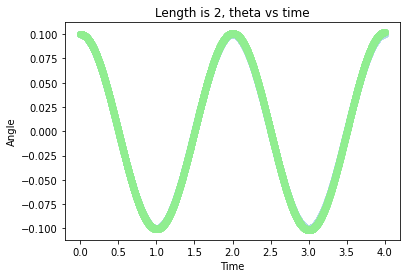

Length is = 2


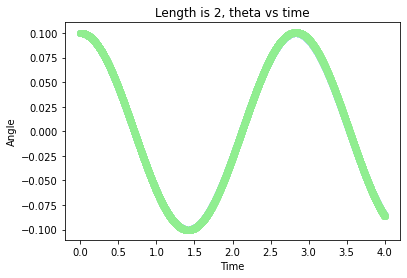

Length is = 3


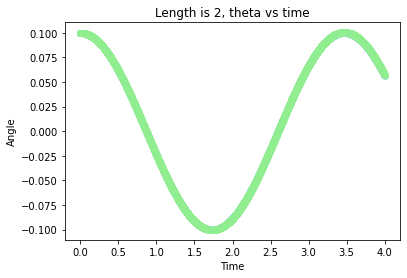

Length is = 4


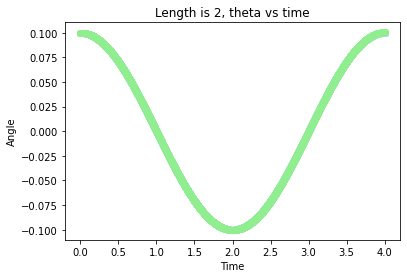

In [4]:
# Finite differences for the simple pendulum

# Here we consider the simple harmonic motion d^\theta/dt^2 + g/l \sin\theta = 0
# an interval with periodicity.

import matplotlib.pyplot as plt
import numpy as np
import scipy
import time
i=1
# set up problem parameters
g  = 9.87 # gravity
T = 4.   # final time in seconds
k = 0.001 # delta t
#print ("Array = ", t1)
L=[1,2,3,4]
for l in L:
  omega = np.sqrt(g/l) # Natural frequency
  M = int(T/k)   # number of time steps
  t = np.arange(M)*k
  #t1 = np.arrange(M)
  print ("Length is =", l)

  # define the initial data
  theta0 = 0.1
  v0 = 0.
  theta1 = theta0
  v1 = v0

  thetaE = np.zeros(M)
  thetaN = np.zeros(M)
  thetaN[0] = theta0
  # analytical linear solution
  for j in range(M):
      thetaE[j] = theta0*np.cos(omega*t[j])

  #np.set_printoptions(threshold=np.inf)

  # forward in time
  def ftheta(theta, v):
      thetadot = v/l
      thetaF = theta + k*thetadot
      return thetaF

  def fv(theta,v):
      vdot = -g*np.sin(theta)
      vF = v + k*vdot
      return vF

  for j in range(1,M):
      theta2 = ftheta(theta1,v1)
      v2 = fv(theta1,v1)
      thetaN[j] = theta2
      theta1 = theta2
      v1 = v2
  
  plt.plot(t, thetaE, linewidth=2, color='lightblue', marker='o')
  plt.plot(t, thetaN, linewidth=2, color='lightgreen', marker='o')
  plt.title('Length is {}, theta vs time'.format(L[i]))
  plt.xlabel('Time')
  plt.ylabel('Angle')
  plt.show()

# Q4  
## Total numbers of time steps is increased as 50,100,800,1000 and it's effect is studied  
## for time steps equal to less than 800, k/h^2 > 0.5, therefore solution blows up and for time step 1000, k/h^ < 0.5, therefor the solution converges

M is 50


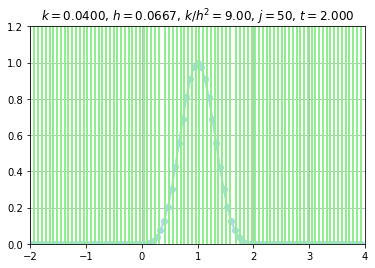

M is 100


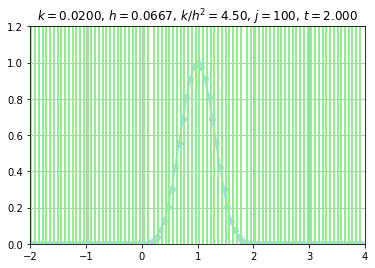

M is 800


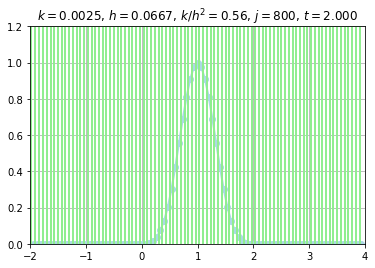

M is 1000


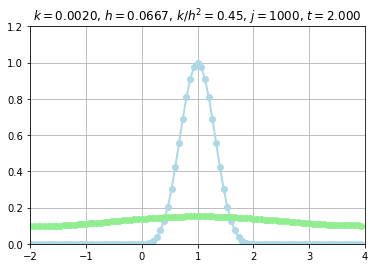

In [5]:
# Finite differences for the heat equation

# Here we consider the heat equation  du/dt - d^2 u/dx^2 = 0  on
# an interval with periodicity.

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.interpolate import UnivariateSpline  # spline used to define initial data
from scipy.sparse.linalg import spsolve  # sparse solver used for implicit methods
import time
for M in [50,100,800,1000]:
  # set up problem parameters
  show_animation = False   # if true every time step is plotted, not only the final time
  x0 = -2. # left end point
  x1 = 4.  # right end point
  T = 2.   # final time
  N = 90   # number of spatial intervals
  h = (x1 - x0)/N  # mesh spacing
  k = T/M          # time step
  x = x0 + np.arange(N)*h  # spatial mesh points (leave out x1, since it is identified with x0 by periodicity)

  # define the initial data, here a cubic B-spline supported in [-1, 1]
  xs = np.linspace(-2., 4., 13)
  ys = np.array([0., 0., 0., 0., 0., .25, 1., .25, 0., 0., 0., 0., 0.])
  spline = UnivariateSpline(xs, ys, s=0) # interpolating spline
  u0 = spline(x) # evaluate initial data at mesh points
  unew= np.zeros((u0.shape[0]+2))
  un= np.zeros((u0.shape[0]))
  utemp= np.zeros((u0.shape[0]+2))

  ## Define various finite difference methods

  # forward differences (conditionally stable)
  def fd(u):
    utemp[0]=u[0]
    utemp[-1]=u[-1]
    utemp[1:N+1]=u[0:N]
#    utemp[1:N]=utemp[]
    for g in range(1,N+1):
      unew[g]=utemp[g]+k/h**2*(utemp[g+1]-2*utemp[g]+utemp[g-1])
    un=unew[1:N+1]
    return un
  plt.ion() # interactive mode is required for the animation
  u = np.copy(u0)
  fig, ax = plt.subplots(1, 1)
  #plt.show() # create the window
  ax.set_xlim(x0, x1)
  ax.set_ylim(0., 1.2)
  ax.grid(True)
  plt.plot(x, u, linewidth=2, color='lightblue', marker='o')
  for j in range(M):
      # advance solution one timestep
      u = fd(u)
      if show_animation:
          # clear plot and replot initial data
          ax.clear()
          ax.set_xlim(x0, x1)
          ax.set_ylim(0., 1.2)
          ax.grid(True)
          plt.plot(x, u0, linewidth=2, color='lightblue', marker='o')
          plt.plot(x, u, linewidth=2, color='lightgreen', marker='o')
          plt.title(r'$k = {:6.4f}$, $h = {:6.4f}$, $k/h^2 = {:4.2f}$, $j = {:4}$, $t = {:7.3f}$'.format(k, h, k/h**2, j+1, (j+1)*k))
          plt.show() # update the window
          fig.canvas.flush_events(); time.sleep(.05) # set the frame advance rate here
  # show the final result
  plt.ioff()
  ax.clear()
  print('M is {}'.format(M))
  ax.set_xlim(x0, x1)
  ax.set_ylim(0., 1.2)
  ax.grid(True)
  plt.plot(x, u0, linewidth=2, color='lightblue', marker='o')
  plt.plot(x, u, linewidth=2, color='lightgreen', marker='o')
  plt.title(r'$k = {:6.4f}$, $h = {:6.4f}$, $k/h^2 = {:4.2f}$, $j = {:4}$, $t = {:7.3f}$'.format(k, h, k/h**2, j+1, (j+1)*k))
  plt.show()


# Q5
## Since we have implemented implicite scheme, we always get converged and stable solution 

k/h^2 = 9.0
M is 50


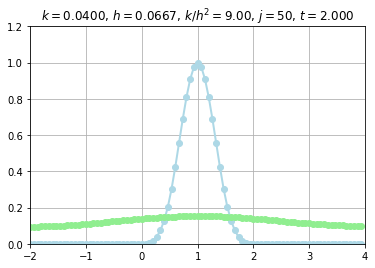

k/h^2 = 4.5
M is 100


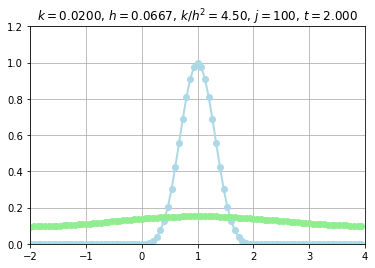

k/h^2 = 0.5625
M is 800


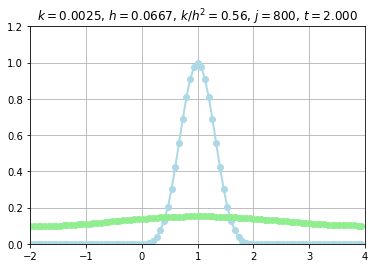

k/h^2 = 0.45
M is 1000


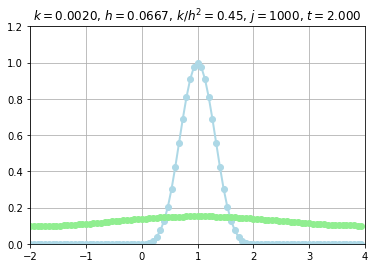

In [6]:
# Finite differences for the heat equation

# Here we consider the heat equation  du/dt - d^2 u/dx^2 = 0  on
# an interval with periodicity.

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.interpolate import UnivariateSpline  # spline used to define initial data
from scipy.sparse.linalg import spsolve  # sparse solver used for implicit methods
import time

# set up problem parameters
show_animation = False   # if true every time step is plotted, not only the final time
x0 = -2. # left end point
x1 = 4.  # right end point
T = 2.   # final time
N = 90   # number of spatial intervals
for M in [50,100,800,1000]:   # number of time steps
  h = (x1 - x0)/N  # mesh spacing
  k = T/M 
  f = k/h**2        # time step
  x = x0 + np.arange(N)*h  # spatial mesh points (leave out x1, since it is identified with x0 by periodicity)
  print ("k/h^2 = {}".format(k/h**2))

  # define the initial data, here a cubic B-spline supported in [-1, 1]
  xs = np.linspace(-2., 4., 13)
  ys = np.array([0., 0., 0., 0., 0., .25, 1., .25, 0., 0., 0., 0., 0.])
  spline = UnivariateSpline(xs, ys, s=0) # interpolating spline
  u0 = spline(x) # evaluate initial data at mesh points

  ## Define various finite difference methods

  K=np.zeros((N,N))
  for i in range(N-1):
    K[i][i]=1+2*f
    K[i][i+1]=-f
    K[i+1][i]=-f
  K[N-1][N-1]=f+1
  K[0][0]=f+1

  Kinv = np.linalg.pinv(K)
  def bd1(u):
    unew = np.matmul(Kinv, u)
    return unew 
  plt.ion() # interactive mode is required for the animation
  u = np.copy(u0)
  fig, ax = plt.subplots(1, 1)
  ax.set_xlim(x0, x1)
  ax.set_ylim(0., 1.2)
  ax.grid(True)

  for j in range(M):
      # advance solution one timestep
      u = bd1(u)
      if show_animation:
          # clear plot and replot initial data
          ax.clear()
          ax.set_xlim(x0, x1)
          ax.set_ylim(0., 1.2)
          ax.grid(True)
          plt.plot(x, u0, linewidth=2, color='lightblue', marker='o')
          plt.plot(x, u, linewidth=2, color='lightgreen', marker='o')
          plt.title(r'$k = {:6.4f}$, $h = {:6.4f}$, $k/h^2 = {:4.2f}$, $j = {:4}$, $t = {:7.3f}$'.format(k, h, k/h**2, j+1, (j+1)*k))
          plt.show() # update the window
          fig.canvas.flush_events(); time.sleep(.05) # set the frame advance rate here
  # show the final result
  plt.ioff()
  print('M is {}'.format(M))
  ax.clear()
  ax.set_xlim(x0, x1)
  ax.set_ylim(0., 1.2)
  ax.grid(True)
  plt.plot(x, u0, linewidth=2, color='lightblue', marker='o')
  plt.plot(x, u, linewidth=2, color='lightgreen', marker='o')
  plt.title(r'$k = {:6.4f}$, $h = {:6.4f}$, $k/h^2 = {:4.2f}$, $j = {:4}$, $t = {:7.3f}$'.format(k, h, k/h**2, j+1, (j+1)*k))
  #plt.title('new')
  #plt.plot(x,u)
  plt.show()


# Q6 
## Central difference method with implicite technique is implemented, so the solution is always stable

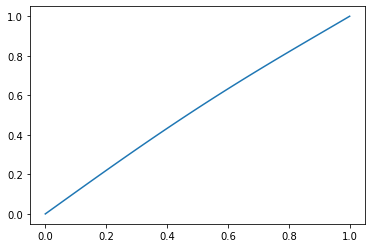

In [7]:
# Finite differences for the heat equation

# Here we consider the heat equation  du/dt - d^2 u/dx^2 = 0  on
# an interval with periodicity.

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.interpolate import UnivariateSpline  # spline used to define initial data
from scipy.sparse.linalg import spsolve  # sparse solver used for implicit methods
import time

# set up problem parameters
x0 = 0. # left end point
x1 = 1  # right end point
N = 100   # number of spatial intervals
h = (x1 - x0)/N  # mesh spacing
x = x0 + np.arange(N+1)*h  # spatial mesh points (leave out x1, since it is identified with x0 by periodicity)

u=np.zeros((N+1))
u[0]=0
u[N]=1

## Define various finite difference methods

K=np.zeros((N-1,N-1))
g = np.zeros(N-1)
for i in range(N-2):
  K[i][i]=2+x[i+1]**2*(h**2)
  K[i][i+1]=-1
  K[i+1][i]=-1
  g[i]=(h**2)*np.sin(x[i+1])
K[N-2][N-2]=2+x[N-1]**2*(h**2)
g[0]=g[0]+u[0]
g[N-2]=(h**2)*np.sin(x[N-1])+u[-1]
Kinv = np.linalg.pinv(K)
u[1:N] = np.matmul(Kinv,g)

plt.plot(x,u)
plt.show()